<a href="https://colab.research.google.com/github/anshupandey/MSA-analytics/blob/main/Model_Monitoring/Lab1_Claim_Prediction_with_MLflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧪 Lab 1: Binary Classification for Insurance Claim Prediction with MLflow

In this lab, we'll train a binary classifier on the Ocean Hull Insurance dataset to predict whether an insurance claim will occur (`Claim_Occurred`).

We'll also log the model, metrics, and pipeline using **MLflow** for experiment tracking and reproducibility.

## 📦 Step 1: Load and Explore the Data

In [1]:
!pip install mlflow --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 13.6 MB/s eta 0:00:00


In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/anshupandey/MSA-analytics/refs/heads/main/datasets/Ocean_Hull_Insurance_datasetv2.csv"
# Load the dataset
df = pd.read_csv(url)
df.drop(columns=["Vessel_ID"], inplace=True)
df.head()

,Vessel_Type,Operating_Zone,Vessel_Age,Flag_State,Inspection_Status,Weather_Risk,Piracy_Risk,Claim_Occurred,Claim_Amount,Premium,Sum_Insured,Daily_Return,Initial_Investment,Final_Value
0,Container Ship,Strait of Malacca,19,Marshall Islands,Overdue,Moderate,Moderate,0,0,159500,14050000,0.000997,95700.0,104676.840752
1,Container Ship,Strait of Malacca,40,Marshall Islands,Up-to-date,High,High,0,0,170000,13000000,0.000362,102000.0,105374.760051
2,Tanker,Indian Ocean,26,Greece,Delayed,Low,Low,0,0,193000,18700000,0.001148,115800.0,128393.183954
3,Bulk Carrier,South China Sea,7,Greece,Up-to-date,Moderate,Low,0,0,123500,11650000,0.002023,74100.0,88881.524555
4,Offshore Support Vessel,Mediterranean,18,Liberia,Delayed,Low,Low,0,0,109000,7100000,0.000266,65400.0,66983.429972


## 🧼 Step 2: Define Features and Target, Train-Test Split

In [3]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=["Claim_Occurred", "Claim_Amount","Daily_Return",'Initial_Investment','Final_Value'])
y = df["Claim_Occurred"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(240, 9) (60, 9) (240,) (60,)


## 🔁 Step 3: Build a Preprocessing and Modeling Pipeline

In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Define column types
categorical_features = X.select_dtypes(include="object").columns.tolist()
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Preprocessing
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Modeling pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

## 📈 Step 4: Train Model and Log Metrics with MLflow

In [6]:
import mlflow
mlflow.set_tracking_uri("http://48.217.49.33:5000")
mlflow.set_experiment("ClaimPrediction")
mlflow.set_tag("model_type", "RandomForestClassifier")
mlflow.set_tag("user","Anshu")

#### F1 Score, Accuracy, Precision, Recall, AUC-ROC



## 📊 Understanding Key Model Evaluation Metrics

When building classification models, it's crucial to evaluate them using appropriate metrics. Below are the core metrics used in **Lab 1**:

---

### 🔁 **Accuracy**

**Definition**:
Accuracy is the ratio of correctly predicted observations to the total observations.

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

**When to use**:

* Works well when classes are balanced.

**Limitation**:

* Misleading when dealing with imbalanced classes.

> Example: In a fraud detection use case with 95% non-fraud and 5% fraud, a model predicting all as non-fraud gets 95% accuracy — but it's useless.

---

### 🎯 **Precision**

**Definition**:
Precision is the ratio of correctly predicted positive observations to the total predicted positives.

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

**When to use**:

* When false positives are costly.
* Example: Approving a high-risk claim.

---

### 🛡️ **Recall (Sensitivity or TPR)**

**Definition**:
Recall is the ratio of correctly predicted positive observations to all actual positives.

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

**When to use**:

* When missing positive cases is more expensive.
* Example: Missing an actual fraud case.

---

### ⚖️ **F1 Score**

**Definition**:
F1 Score is the weighted harmonic mean of Precision and Recall.

$$
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

**When to use**:

* When you need a balance between precision and recall.
* Especially useful for **imbalanced classification** problems like insurance claims, fraud detection, etc.

---



In [8]:
import mlflow.sklearn
from sklearn.metrics import classification_report, roc_auc_score

mlflow.end_run()
with mlflow.start_run():
    # Fit the model
    pipeline.fit(X_train, y_train) # train the model using train data

    # Predict and evaluate
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    # Calculate metrics
    auc = roc_auc_score(y_test, y_proba)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Log parameters and metrics
    mlflow.log_param("model_type", "RandomForestClassifier")
    mlflow.log_metric("roc_auc", auc)
    mlflow.log_metric("precision", report['1']['precision'])
    mlflow.log_metric("recall", report['1']['recall'])
    mlflow.log_metric("f1_score", report['1']['f1-score'])

    # Log model pipeline
    mlflow.sklearn.log_model(pipeline, "rf_pipeline")

    print("MLflow logging complete.")

🏃 View run luminous-robin-885 at: http://48.217.49.33:5000/#/experiments/199491697363636286/runs/b771940ad1954c8e8517aeb4ec18dd8d
🧪 View experiment at: http://48.217.49.33:5000/#/experiments/199491697363636286


2025/06/26 08:23:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/06/26 08:23:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow logging complete.
🏃 View run grandiose-tern-318 at: http://48.217.49.33:5000/#/experiments/199491697363636286/runs/01d1de38491d4a709bc7f40bff103159
🧪 View experiment at: http://48.217.49.33:5000/#/experiments/199491697363636286


## ✅ Results
You should now see the model and metrics logged in your MLflow dashboard.

To run the MLflow UI:
```bash
mlflow ui
```
Then open `http://localhost:5000` in your browser.

## ✅ Code Snippets for Extended Lab 1 Functionality

---

### 🔁 MLflow Autologging

In [9]:
import mlflow.sklearn

mlflow.sklearn.autolog()  # Enables automatic logging of parameters, metrics, artifacts


This will automatically log:

* Parameters (like `n_estimators`, `max_depth`)
* Metrics (like accuracy, precision, recall)
* Model artifacts (like sklearn model object)
* Training duration and environment details

---


### 📦 Model Training, Evaluation, and Logging


In [10]:
import mlflow
from mlflow import evaluate
from mlflow.models.signature import infer_signature
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import shap, mlflow.shap


mlflow.sklearn.autolog()
with mlflow.start_run() as run:
    pipeline.fit(X_train, y_train)


2025/06/26 08:26:45 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.11/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/06/26 08:26:46 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.11/dist-packages/mlflow/types/utils

🏃 View run able-sponge-54 at: http://48.217.49.33:5000/#/experiments/199491697363636286/runs/854c048a2fc441ed9a938cabed80ccfd
🧪 View experiment at: http://48.217.49.33:5000/#/experiments/199491697363636286


In [11]:

mlflow.sklearn.autolog()
with mlflow.start_run() as run:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    report = classification_report(y_test, y_pred, output_dict=True)
    auc_score = roc_auc_score(y_test, y_proba)


     # Infer the model signature
    signature = infer_signature(X_train, pipeline.predict(X_train))

    # Get the model URI
    model_uri = mlflow.get_artifact_uri("model")

    # Prepare evaluation data
    eval_data = X_test.copy()
    eval_data["Claim_Occurred"] = y_test.values

    # Evaluate the model
    model_info = mlflow.sklearn.log_model(pipeline,"rf_model",signature=signature)

    model_uri = model_info.model_uri
    evalution_config = {"log_model_explainability":True, "metric_prefix":"test_",}

    result = mlflow.evaluate(model_uri,eval_data,targets='Claim_Occurred',
                             model_type='classifier',
                             evaluator_config=evalution_config)





    # log a scoring file
    eval_data['prediction'] = pipeline.predict(eval_data.drop(columns=['Claim_Occurred']))
    eval_data.to_csv("eval_data.csv")
    mlflow.log_artifact("eval_data.csv",artifact_path="eval_data")

    # Access evaluation metrics
    print("Evaluation Metrics:")
    for metric_name, metric_value in result.metrics.items():
        print(f"{metric_name}: {metric_value}")

mlflow.end_run()

2025/06/26 08:29:13 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.11/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/06/26 08:29:13 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.11/dist-packages/mlflow/types/utils

2025/06/26 08:29:29 INFO mlflow.tracking.fluent: Active model is set to the logged model with ID: m-bbe7a5c95580482480bf35a66ccc2f7b
2025/06/26 08:29:29 INFO mlflow.tracking.fluent: Use `mlflow.set_active_model` to set the active model to a different one if needed.
/usr/local/lib/python3.11/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.

Evaluation Metrics:
test_score: 0.95
test_true_negatives: 45
test_false_positives: 1
test_false_negatives: 2
test_true_positives: 12
test_example_count: 60
test_accuracy_score: 0.95
test_recall_score: 0.8571428571428571
test_precision_score: 0.9230769230769231
test_f1_score: 0.8888888888888888
test_log_loss: 0.2446810389335979
test_roc_auc: 0.8990683229813665
test_precision_recall_auc: 0.8777419948472579
🏃 View run shivering-newt-466 at: http://48.217.49.33:5000/#/experiments/199491697363636286/runs/ef76ec151f2e4d19bb8351ff0a14d07d
🧪 View experiment at: http://48.217.49.33:5000/#/experiments/199491697363636286


<Figure size 1050x700 with 0 Axes>


### 📁 Logging Artifacts (e.g., classification report, confusion matrix)


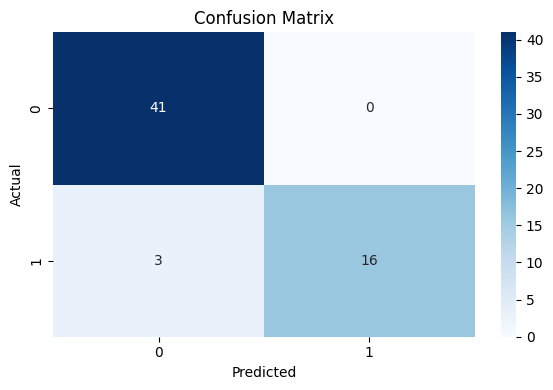

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Save confusion matrix as an artifact
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()

artifact_path = "outputs"
os.makedirs(artifact_path, exist_ok=True)
plt.savefig(f"{artifact_path}/confusion_matrix.png")

mlflow.log_artifact(f"{artifact_path}/confusion_matrix.png")

---

### 📝 Log and Register the Model


In [ ]:
# Log the model explicitly (in addition to autologging)
mlflow.sklearn.log_model(pipeline, name="rf_pipeline")

# Register the model
result = mlflow.register_model(
    model_uri=f"runs:/{run.info.run_id}/rf_pipeline",
    name="ClaimPredictionModel"
)

print(f"Model registered as version: {result.version}")

2025/06/26 06:32:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'ClaimPredictionModel' already exists. Creating a new version of this model...
2025/06/26 06:32:20 WARNING mlflow.tracking._model_registry.fluent: Run with id 264dbac039ec4d81b8cc1aab97f1d684 has no artifacts at artifact path 'rf_pipeline', registering model based on models:/m-0e5d8c677b9b4bab85c6294c3a0a67a2 instead


Model registered as version: 1


Created version '1' of model 'ClaimPredictionModel'.




### Thank You !!